============================================================================
## ИМПОРТ БИБЛИОТЕК
============================================================================

In [37]:
"""Импорт необходимых библиотек для анализа и машинного обучения."""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings

warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

============================================================================
## ЧТЕНИЕ ЭКСЕЛЕК И ОБЪЕДИНИЕ
============================================================================

In [38]:
"""Чтение данных из Excel файлов в pandas DataFrame."""

df_features = pd.read_excel('X.xlsx')
df_target = pd.read_excel('y.xlsx')

print(f"Размер X: {df_features.shape}")
print(f"Размер y: {df_target.shape}")
print("\nПервые строки X:")
print(df_features.head(3))
print("\nПервые строки y:")
print(df_target.head(3))

Размер X: (52131, 32)
Размер y: (52131, 1)

Первые строки X:
   Пол  Возраст  position_group_analyst  position_group_dev  \
0    1       42                   False               False   
1    1       41                   False               False   
2    1       44                   False               False   

   position_group_engineer  position_group_manager  position_group_marketing  \
0                    False                   False                     False   
1                    False                   False                     False   
2                    False                   False                     False   

   position_group_other  position_group_support  city_medium_city  ...  \
0                 False                   False              True  ...   
1                 False                   False             False  ...   
2                 False                   False              True  ...   

   years_experience  Авто_наличие  position_group_last_dev  \
0     

In [39]:
"""Объединение признаков и целевой переменной в один DataFrame."""

data = pd.concat([df_features, df_target], axis=1)

print(f"Размер объединенного датафрейма: {data.shape}")
print(f"\nКоличество столбцов: {len(data.columns)}")
print(f"Количество строк: {len(data)}")
print("\nПервые строки объединенного датафрейма:")
print(data.head(3))

Размер объединенного датафрейма: (52131, 33)

Количество столбцов: 33
Количество строк: 52131

Первые строки объединенного датафрейма:
   Пол  Возраст  position_group_analyst  position_group_dev  \
0    1       42                   False               False   
1    1       41                   False               False   
2    1       44                   False               False   

   position_group_engineer  position_group_manager  position_group_marketing  \
0                    False                   False                     False   
1                    False                   False                     False   
2                    False                   False                     False   

   position_group_other  position_group_support  city_medium_city  ...  \
0                 False                   False              True  ...   
1                 False                   False             False  ...   
2                 False                   False              True  ..

============================================================================
## ФОРМИРОВАНИЕ УРОВНЯ РАЗРАБОТЧИКА
============================================================================

In [41]:
"""Выбор только тех резюме, где position_group_last_dev == True."""

data_developers = data[data['position_group_dev'] == True].copy()

total_resumes = len(data)
developer_resumes = len(data_developers)
developer_percentage = (developer_resumes / total_resumes) * 100

print(f"Всего резюме в исходных данных: {total_resumes}")
print(f"Резюме разработчиков: {developer_resumes}")
print(f"Процент разработчиков: {developer_percentage:.2f}%")

Всего резюме в исходных данных: 52131
Резюме разработчиков: 10642
Процент разработчиков: 20.41%


Статистика по опыту работы разработчиков:
count    10642.000000
mean         8.735975
std          7.077316
min          0.083333
25%          3.000000
50%          7.250000
75%         12.416667
max         45.000000
Name: years_experience, dtype: float64

Минимальный опыт: 0.08 лет
Максимальный опыт: 45.00 лет
Медианный опыт: 7.25 лет


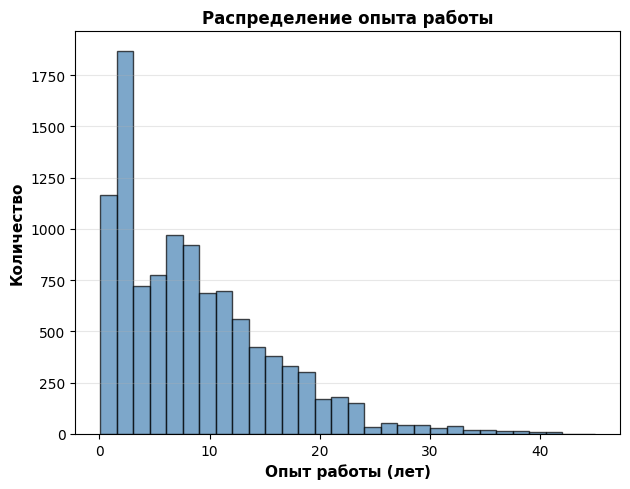

In [43]:
"""Статистический анализ опыта работы."""

years_exp = data_developers['years_experience']

print("Статистика по опыту работы разработчиков:")
print(years_exp.describe())
print(f"\nМинимальный опыт: {years_exp.min():.2f} лет")
print(f"Максимальный опыт: {years_exp.max():.2f} лет")
print(f"Медианный опыт: {years_exp.median():.2f} лет")

# Визуализация распределения опыта
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(years_exp, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Опыт работы (лет)', fontsize=11, fontweight='bold')
plt.ylabel('Количество', fontsize=11, fontweight='bold')
plt.title('Распределение опыта работы', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [44]:
"""Определение уровня разработчика на основе опыта работы."""

def get_developer_level(years):
    """
    Определяет уровень разработчика по опыту работы.

    Parameters:
        years (float): Количество лет опыта

    Returns:
        str: Уровень ('junior', 'middle' или 'senior')
    """
    if years < 3:
        return 'junior'
    elif years <= 6:
        return 'middle'
    else:
        return 'senior'


data_developers['level'] = data_developers['years_experience'].apply(
    get_developer_level
)

level_counts = data_developers['level'].value_counts().sort_index()
level_percentages = data_developers['level'].value_counts(
    normalize=True
).sort_index() * 100

print("Распределение по уровням:")
print(level_counts)
print("\nПроцентное распределение:")
for level, percentage in level_percentages.items():
    print(f"{level}: {percentage:.2f}%")

Распределение по уровням:
level
junior    2316
middle    2219
senior    6107
Name: count, dtype: int64

Процентное распределение:
junior: 21.76%
middle: 20.85%
senior: 57.39%


============================================================================
## БАЛАНС КЛАССОВ
============================================================================

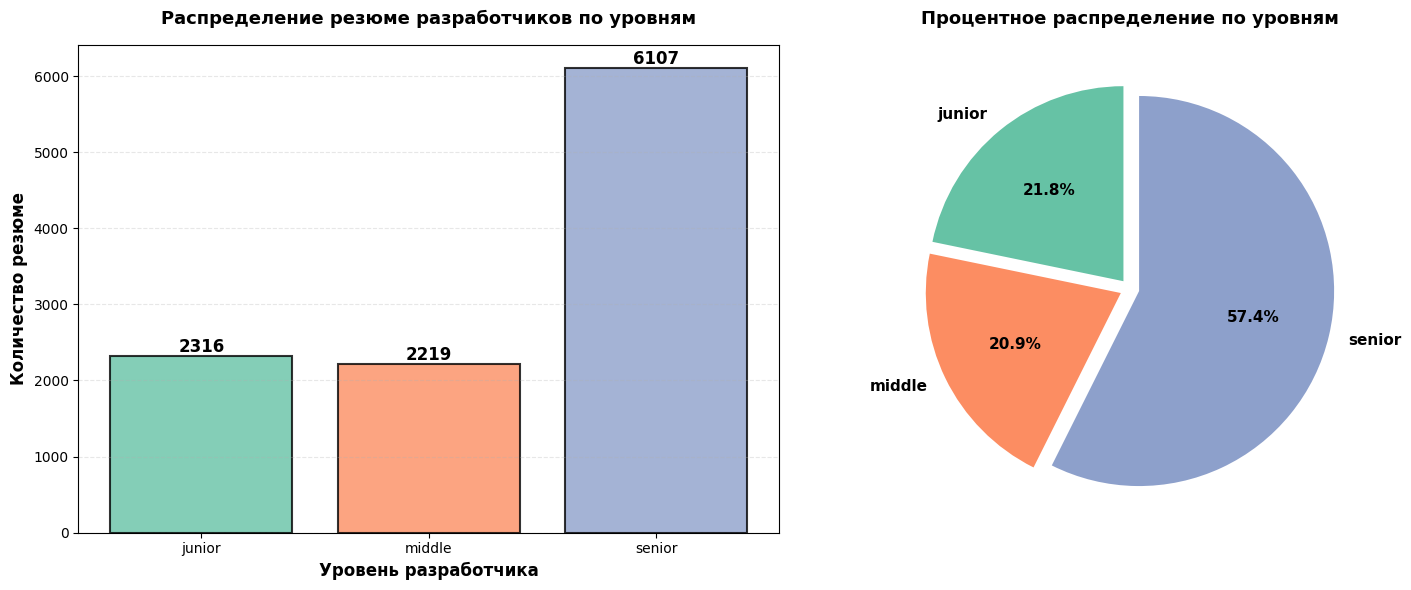


АНАЛИЗ БАЛАНСА КЛАССОВ
Самый большой класс: senior (6107 резюме)
Самый маленький класс: middle (2219 резюме)
Коэффициент дисбаланса: 2.75


In [45]:
"""Построение графиков распределения резюме по уровням."""

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Столбчатая диаграмма
level_counts = data_developers['level'].value_counts().sort_index()
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

bars = axes[0].bar(
    level_counts.index,
    level_counts.values,
    color=colors,
    edgecolor='black',
    linewidth=1.5,
    alpha=0.8
)

# Добавление значений на столбцы
for bar in bars:
    height = bar.get_height()
    axes[0].text(
        bar.get_x() + bar.get_width() / 2.,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

axes[0].set_xlabel('Уровень разработчика', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Количество резюме', fontsize=12, fontweight='bold')
axes[0].set_title(
    'Распределение резюме разработчиков по уровням',
    fontsize=13,
    fontweight='bold',
    pad=15
)
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

# Круговая диаграмма
explode = (0.05, 0.05, 0.05)
wedges, texts, autotexts = axes[1].pie(
    level_counts.values,
    labels=level_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    textprops={'fontsize': 11, 'fontweight': 'bold'}
)

axes[1].set_title(
    'Процентное распределение по уровням',
    fontsize=13,
    fontweight='bold',
    pad=15
)

plt.tight_layout()
plt.show()

# Анализ баланса классов
print("\n" + "="*60)
print("АНАЛИЗ БАЛАНСА КЛАССОВ")
print("="*60)
max_class = level_counts.max()
min_class = level_counts.min()
imbalance_ratio = max_class / min_class

print(f"Самый большой класс: {level_counts.idxmax()} ({max_class} резюме)")
print(f"Самый маленький класс: {level_counts.idxmin()} ({min_class} резюме)")
print(f"Коэффициент дисбаланса: {imbalance_ratio:.2f}")

============================================================================
## ПОДГОТОВКА ДАННЫХ ДЛЯ ОБУЧЕНИЯ
============================================================================

In [46]:
"""Подготовка признаков и целевой переменной для модели."""

# Определяем столбцы для удаления
columns_to_drop = ['years_experience', 'level', 'position_group_last_dev']

X = data_developers.drop(columns_to_drop, axis=1)
y = data_developers['level']

print("Признаки для обучения:")
print(f"Количество признаков: {X.shape[1]}")
print(f"\nСписок признаков:")
for i, col in enumerate(X.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\n{'='*60}")
print(f"Размер матрицы признаков X: {X.shape}")
print(f"Размер вектора целей y: {y.shape}")

Признаки для обучения:
Количество признаков: 31

Список признаков:
 1. Пол
 2. Возраст
 3. position_group_analyst
 4. position_group_dev
 5. position_group_engineer
 6. position_group_manager
 7. position_group_marketing
 8. position_group_other
 9. position_group_support
10. city_medium_city
11. city_moscow
12. city_small_city
13. city_spb
14. business_trip_rare
15. business_trip_yes
16. full_time
17. part_time
18. project_like
19. full_day
20. flexible
21. shift_or_rotation
22. remote
23. Авто_наличие
24. position_group_last_engineer
25. position_group_last_manager
26. position_group_last_marketing_sales
27. position_group_last_other
28. position_group_last_support
29. position_group_last_sysadmin
30. edu_has_higher
31. ЗП

Размер матрицы признаков X: (10642, 31)
Размер вектора целей y: (10642,)


In [47]:
"""Разделение данных на train/test с сохранением пропорций классов."""

TEST_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

print(f"Размер обучающей выборки: {X_train.shape[0]} ({(1-TEST_SIZE)*100:.0f}%)")
print(f"Размер тестовой выборки: {X_test.shape[0]} ({TEST_SIZE*100:.0f}%)")

print(f"\n{'='*60}")
print("Распределение классов в обучающей выборке:")
train_dist = y_train.value_counts().sort_index()
for level, count in train_dist.items():
    percentage = (count / len(y_train)) * 100
    print(f"  {level}: {count} ({percentage:.1f}%)")

print(f"\nРаспределение классов в тестовой выборке:")
test_dist = y_test.value_counts().sort_index()
for level, count in test_dist.items():
    percentage = (count / len(y_test)) * 100
    print(f"  {level}: {count} ({percentage:.1f}%)")

Размер обучающей выборки: 8513 (80%)
Размер тестовой выборки: 2129 (20%)

Распределение классов в обучающей выборке:
  junior: 1853 (21.8%)
  middle: 1775 (20.9%)
  senior: 4885 (57.4%)

Распределение классов в тестовой выборке:
  junior: 463 (21.7%)
  middle: 444 (20.9%)
  senior: 1222 (57.4%)


============================================================================
## ОБУЧЕНИЕ КЛАССИФИКАТОРА
============================================================================

In [48]:
"""Обучение модели Random Forest с учетом дисбаланса классов."""

# Параметры модели
MODEL_PARAMS = {
    'n_estimators': 100,
    'max_depth': 10,
    'random_state': RANDOM_STATE,
    'class_weight': 'balanced',  # Учет дисбаланса классов
    'n_jobs': -1,
    'min_samples_split': 5,
    'min_samples_leaf': 2
}

classifier = RandomForestClassifier(**MODEL_PARAMS)

print("Обучение модели Random Forest...")
print(f"Параметры модели:")
for param, value in MODEL_PARAMS.items():
    print(f"  {param}: {value}")

classifier.fit(X_train, y_train)
print("\n✓ Модель успешно обучена!")

# Оценка точности
train_accuracy = classifier.score(X_train, y_train)
test_accuracy = classifier.score(X_test, y_test)

print(f"\n{'='*60}")
print("РЕЗУЛЬТАТЫ ОБУЧЕНИЯ")
print(f"{'='*60}")
print(f"Точность на обучающей выборке: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Точность на тестовой выборке:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Проверка на переобучение
overfitting_gap = train_accuracy - test_accuracy
print(f"\nРазница точностей: {overfitting_gap:.4f}")

Обучение модели Random Forest...
Параметры модели:
  n_estimators: 100
  max_depth: 10
  random_state: 42
  class_weight: balanced
  n_jobs: -1
  min_samples_split: 5
  min_samples_leaf: 2

✓ Модель успешно обучена!

РЕЗУЛЬТАТЫ ОБУЧЕНИЯ
Точность на обучающей выборке: 0.8012 (80.12%)
Точность на тестовой выборке:  0.7548 (75.48%)

Разница точностей: 0.0464


============================================================================
## ОТЧЁТ О КЛАССИФИКАЦИИ
============================================================================

In [49]:
"""Получение предсказаний и построение детального отчета."""

y_pred = classifier.predict(X_test)

print("="*70)
print("ОТЧЕТ О КЛАССИФИКАЦИИ")
print("="*70)
print()

# Детальный отчет
report = classification_report(
    y_test,
    y_pred,
    target_names=['junior', 'middle', 'senior'],
    digits=3
)
print(report)

# Дополнительный анализ по классам
print("\n" + "="*70)
print("ДЕТАЛЬНЫЙ АНАЛИЗ ПО КЛАССАМ")
print("="*70)

from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(
    y_test,
    y_pred,
    labels=['junior', 'middle', 'senior']
)

for i, level in enumerate(['junior', 'middle', 'senior']):
    print(f"\n{level.upper()}:")
    print(f"  Размер выборки: {support[i]}")
    print(f"  Precision: {precision[i]:.3f}")
    print(f"  Recall:    {recall[i]:.3f}")
    print(f"  F1-score:  {f1[i]:.3f}")

ОТЧЕТ О КЛАССИФИКАЦИИ

              precision    recall  f1-score   support

      junior      0.737     0.659     0.696       463
      middle      0.481     0.588     0.529       444
      senior      0.888     0.852     0.870      1222

    accuracy                          0.755      2129
   macro avg      0.702     0.699     0.698      2129
weighted avg      0.770     0.755     0.761      2129


ДЕТАЛЬНЫЙ АНАЛИЗ ПО КЛАССАМ

JUNIOR:
  Размер выборки: 463
  Precision: 0.737
  Recall:    0.659
  F1-score:  0.696

MIDDLE:
  Размер выборки: 444
  Precision: 0.481
  Recall:    0.588
  F1-score:  0.529

SENIOR:
  Размер выборки: 1222
  Precision: 0.888
  Recall:    0.852
  F1-score:  0.870


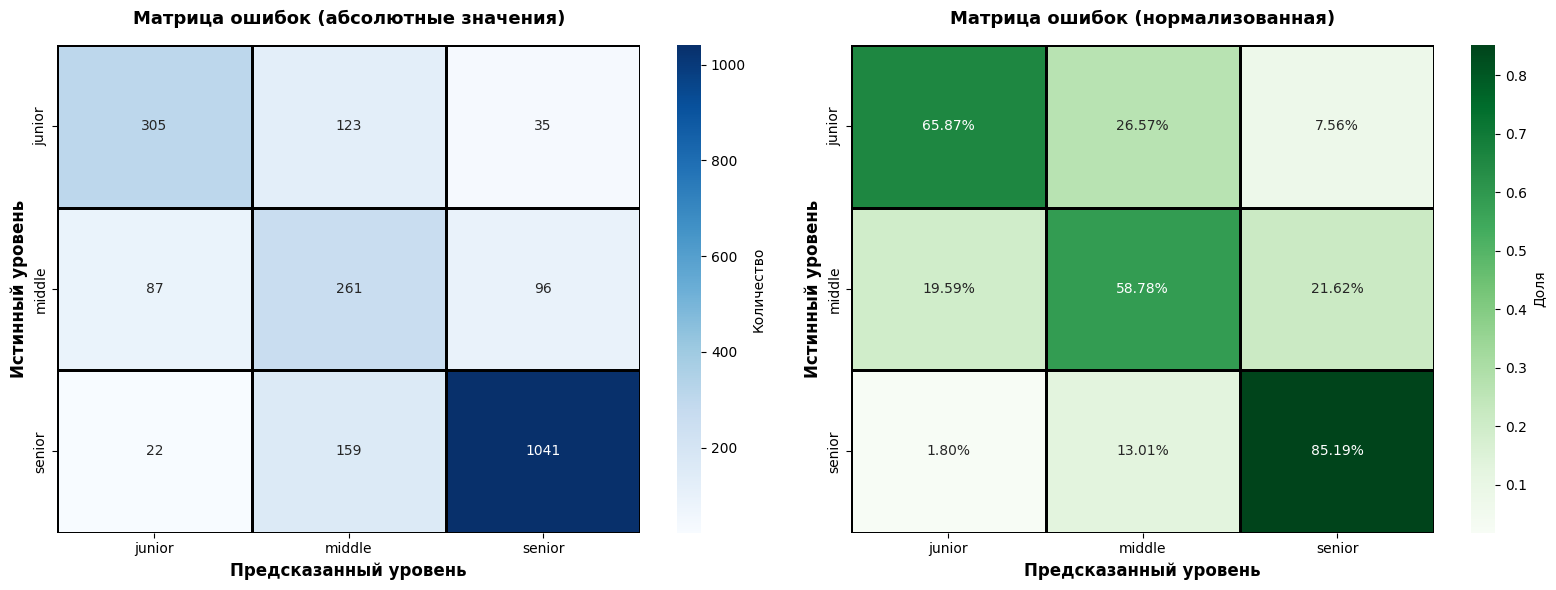


АНАЛИЗ ОШИБОК КЛАССИФИКАЦИИ

Общее количество ошибок: 522
Процент ошибок: 24.52%
Точность: 75.48%

Наиболее частые ошибки:
  junior → middle: 123 (26.6%)
  junior → senior: 35 (7.6%)
  middle → junior: 87 (19.6%)
  middle → senior: 96 (21.6%)
  senior → junior: 22 (1.8%)
  senior → middle: 159 (13.0%)


In [50]:
"""Визуализация матрицы ошибок классификации."""

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Абсолютные значения
cm = confusion_matrix(y_test, y_pred, labels=['junior', 'middle', 'senior'])

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['junior', 'middle', 'senior'],
    yticklabels=['junior', 'middle', 'senior'],
    cbar_kws={'label': 'Количество'},
    linewidths=1,
    linecolor='black',
    ax=axes[0]
)

axes[0].set_xlabel('Предсказанный уровень', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Истинный уровень', fontsize=12, fontweight='bold')
axes[0].set_title(
    'Матрица ошибок (абсолютные значения)',
    fontsize=13,
    fontweight='bold',
    pad=15
)

# Нормализованные значения (в процентах)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(
    cm_normalized,
    annot=True,
    fmt='.2%',
    cmap='Greens',
    xticklabels=['junior', 'middle', 'senior'],
    yticklabels=['junior', 'middle', 'senior'],
    cbar_kws={'label': 'Доля'},
    linewidths=1,
    linecolor='black',
    ax=axes[1]
)

axes[1].set_xlabel('Предсказанный уровень', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Истинный уровень', fontsize=12, fontweight='bold')
axes[1].set_title(
    'Матрица ошибок (нормализованная)',
    fontsize=13,
    fontweight='bold',
    pad=15
)

plt.tight_layout()
plt.show()

# Анализ ошибок
print("\n" + "="*70)
print("АНАЛИЗ ОШИБОК КЛАССИФИКАЦИИ")
print("="*70)

total_errors = np.sum(cm) - np.trace(cm)
error_rate = total_errors / np.sum(cm)

print(f"\nОбщее количество ошибок: {total_errors}")
print(f"Процент ошибок: {error_rate*100:.2f}%")
print(f"Точность: {(1-error_rate)*100:.2f}%")

# Анализ путаниц между классами
print("\nНаиболее частые ошибки:")
for i, true_label in enumerate(['junior', 'middle', 'senior']):
    for j, pred_label in enumerate(['junior', 'middle', 'senior']):
        if i != j and cm[i, j] > 0:
            error_pct = (cm[i, j] / cm[i].sum()) * 100
            print(f"  {true_label} → {pred_label}: {cm[i, j]} ({error_pct:.1f}%)")

ВАЖНОСТЬ ПРИЗНАКОВ

Топ-20 самых важных признаков:
                     feature  importance
                     Возраст    0.617055
                          ЗП    0.169887
                Авто_наличие    0.017223
           business_trip_yes    0.015869
              edu_has_higher    0.015135
          business_trip_rare    0.012724
                      remote    0.011711
           shift_or_rotation    0.011564
                 city_moscow    0.011530
                    flexible    0.011006
                project_like    0.010997
                   part_time    0.010993
 position_group_last_manager    0.010005
   position_group_last_other    0.008799
             city_small_city    0.008796
                         Пол    0.008618
                    full_day    0.008254
position_group_last_engineer    0.007554
                    city_spb    0.006802
                   full_time    0.006793


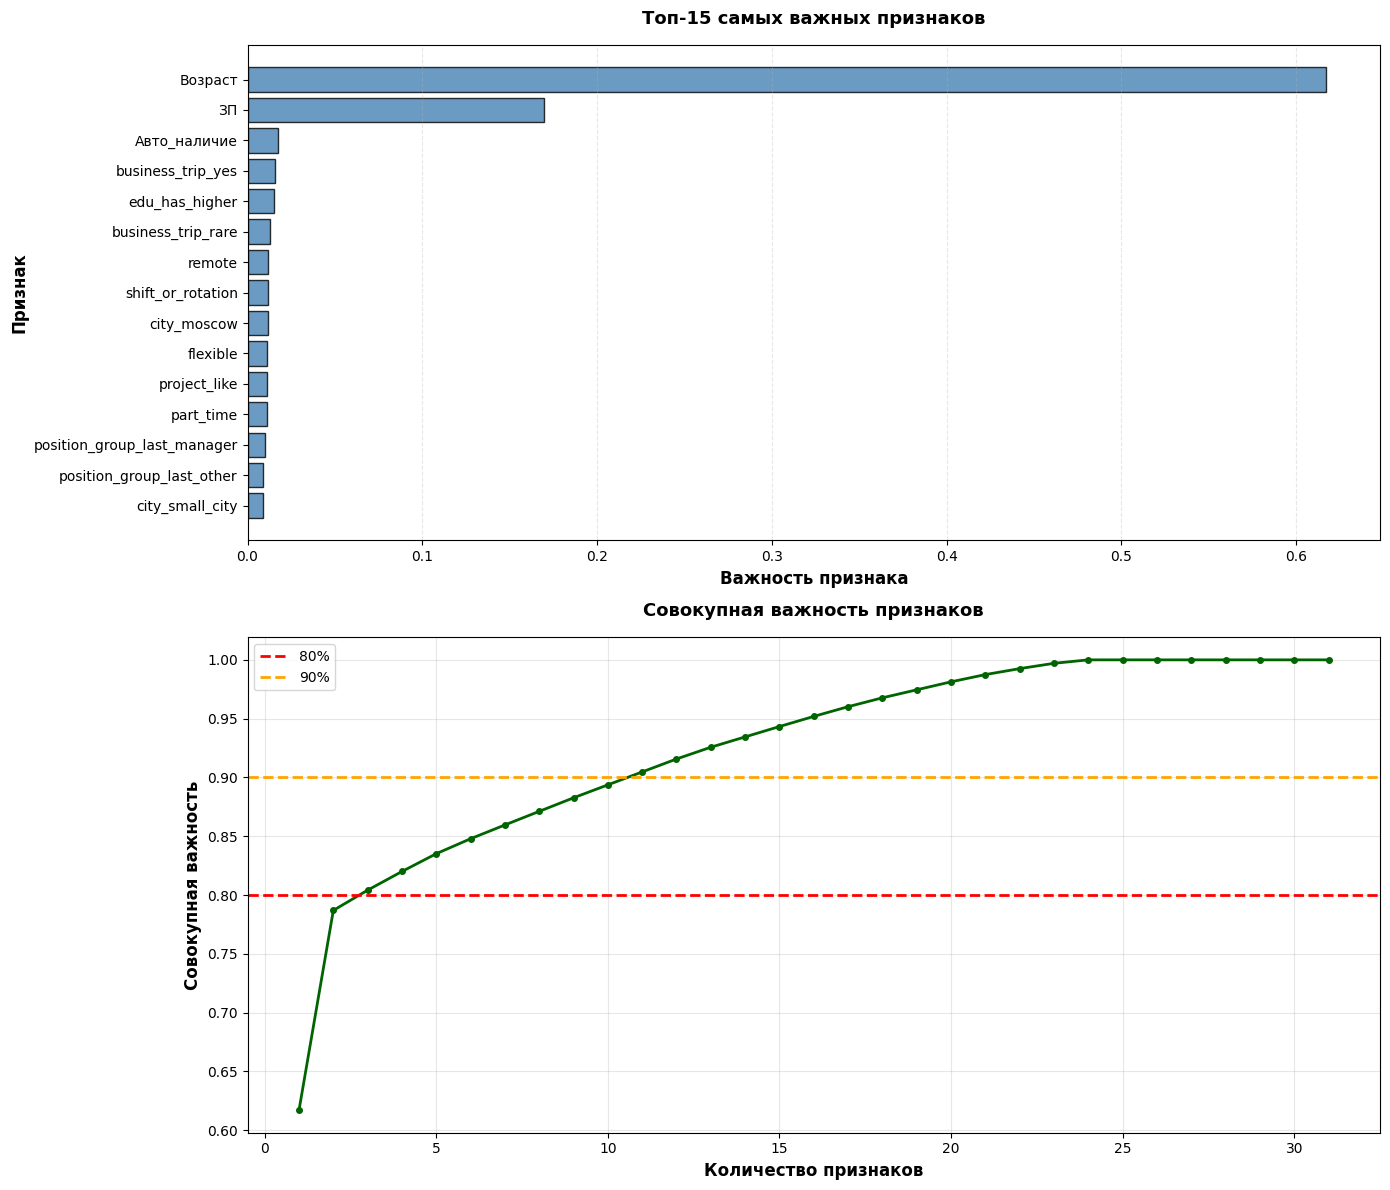


АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ

Признаков для 80% важности: 23 из 31
Признаков для 90% важности: 18 из 31

Самый важный признак: 'Возраст'
Важность: 0.6171


In [51]:
"""Анализ важности признаков для модели."""

# Создание DataFrame с важностью признаков
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("="*70)
print("ВАЖНОСТЬ ПРИЗНАКОВ")
print("="*70)
print("\nТоп-20 самых важных признаков:")
print(feature_importance_df.head(20).to_string(index=False))

# Визуализация
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# График топ-15 признаков
top_n = 15
top_features = feature_importance_df.head(top_n)

axes[0].barh(
    range(len(top_features)),
    top_features['importance'].values,
    color='steelblue',
    edgecolor='black',
    alpha=0.8
)
axes[0].set_yticks(range(len(top_features)))
axes[0].set_yticklabels(top_features['feature'].values)
axes[0].set_xlabel('Важность признака', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Признак', fontsize=12, fontweight='bold')
axes[0].set_title(
    f'Топ-{top_n} самых важных признаков',
    fontsize=13,
    fontweight='bold',
    pad=15
)
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3, linestyle='--')

# Совокупная важность признаков
cumulative_importance = feature_importance_df['importance'].cumsum()
axes[1].plot(
    range(1, len(cumulative_importance) + 1),
    cumulative_importance.values,
    marker='o',
    linewidth=2,
    markersize=4,
    color='darkgreen'
)
axes[1].axhline(y=0.8, color='red', linestyle='--', linewidth=2, label='80%')
axes[1].axhline(y=0.9, color='orange', linestyle='--', linewidth=2, label='90%')
axes[1].set_xlabel('Количество признаков', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Совокупная важность', fontsize=12, fontweight='bold')
axes[1].set_title(
    'Совокупная важность признаков',
    fontsize=13,
    fontweight='bold',
    pad=15
)
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

# Анализ важности
print(f"\n{'='*70}")
print("АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ")
print(f"{'='*70}")

# Сколько признаков дают 80% важности
importance_80 = (cumulative_importance >= 0.8).idxmax() + 1
importance_90 = (cumulative_importance >= 0.9).idxmax() + 1

print(f"\nПризнаков для 80% важности: {importance_80} из {len(X.columns)}")
print(f"Признаков для 90% важности: {importance_90} из {len(X.columns)}")

# Самый важный признак
most_important = feature_importance_df.iloc[0]
print(f"\nСамый важный признак: '{most_important['feature']}'")
print(f"Важность: {most_important['importance']:.4f}")

In [54]:
# Ячейка 15: Комплексный анализ и выводы
"""Комплексный анализ качества модели и выводы."""

print("="*80)
print(" "*20 + "ИТОГОВЫЕ ВЫВОДЫ О КАЧЕСТВЕ МОДЕЛИ")
print("="*80)

# 1. Общее качество модели
print("\n1. ОБЩЕЕ КАЧЕСТВО МОДЕЛИ")
print("-" * 80)
overall_accuracy = test_accuracy
print(f"Точность на тестовой выборке: {overall_accuracy:.2%}")

if overall_accuracy >= 0.8:
    quality_assessment = "ВЫСОКОЕ"
    emoji = "✓✓✓"
elif overall_accuracy >= 0.6:
    quality_assessment = "СРЕДНЕЕ"
    emoji = "✓✓"
else:
    quality_assessment = "НИЗКОЕ"
    emoji = "✓"

print(f"Общая оценка качества: {quality_assessment} {emoji}")

# 2. Анализ дисбаланса классов
print(f"\n2. ВЛИЯНИЕ ДИСБАЛАНСА КЛАССОВ")
print("-" * 80)

class_distribution = y.value_counts().sort_index()
max_class_size = class_distribution.max()
min_class_size = class_distribution.min()
imbalance_ratio = max_class_size / min_class_size

print(f"Коэффициент дисбаланса: {imbalance_ratio:.2f}")
print(f"Распределение классов:")
for level, count in class_distribution.items():
    pct = (count / len(y)) * 100
    print(f"  {level}: {count} ({pct:.1f}%)")

if imbalance_ratio > 3:
    print("\n⚠️  ВЫВОД: Сильный дисбаланс классов негативно влияет на модель.")
    print("   Модель может быть смещена в сторону мажоритарного класса.")
    print("   РЕКОМЕНДАЦИЯ: Использовать методы балансировки (SMOTE, undersampling)")
    print("   или корректировку весов классов (уже применено: class_weight='balanced').")
elif imbalance_ratio > 1.5:
    print("\n⚠️  ВЫВОД: Умеренный дисбаланс частично компенсирован параметром")
    print("   class_weight='balanced', но может влиять на качество.")
else:
    print("\n✓ ВЫВОД: Классы сбалансированы, дисбаланс не является проблемой.")

# 3. Анализ качества по классам
print(f"\n3. КАЧЕСТВО ПРЕДСКАЗАНИЙ ПО КЛАССАМ")
print("-" * 80)

precision, recall, f1, support = precision_recall_fscore_support(
    y_test,
    y_pred,
    labels=['junior', 'middle', 'senior']
)

for i, level in enumerate(['junior', 'middle', 'senior']):
    print(f"\n{level.upper()}:")
    print(f"  F1-score: {f1[i]:.3f} | Precision: {precision[i]:.3f} | Recall: {recall[i]:.3f}")

    if f1[i] < 0.5:
        print(f"  ⚠️  ПРОБЛЕМА: Низкое качество предсказаний")
        if precision[i] < recall[i]:
            print(f"     Модель часто ошибочно предсказывает класс '{level}'")
        else:
            print(f"     Модель плохо распознает класс '{level}'")
    elif f1[i] >= 0.7:
        print(f"  ✓ Хорошее качество предсказаний")

# 4. Анализ переобучения
print(f"\n4. ПЕРЕОБУЧЕНИЕ")
print("-" * 80)
train_acc = train_accuracy
test_acc = test_accuracy
overfit_gap = train_acc - test_acc

print(f"Точность на train: {train_acc:.4f}")
print(f"Точность на test:  {test_acc:.4f}")
print(f"Разница: {overfit_gap:.4f}")

if overfit_gap > 0.1:
    print("\n⚠️  ВЫВОД: Значительное переобучение!")
    print("   РЕКОМЕНДАЦИИ:")
    print("   - Уменьшить max_depth (сейчас 10)")
    print("   - Увеличить min_samples_split и min_samples_leaf")
    print("   - Использовать регуляризацию")
    print("   - Собрать больше данных")
elif overfit_gap > 0.05:
    print("\n⚠️  ВЫВОД: Небольшое переобучение, в пределах нормы.")
else:
    print("\n✓ ВЫВОД: Переобучение отсутствует или минимально.")

# 5. Важность признаков
print(f"\n5. КАЧЕСТВО И ВАЖНОСТЬ ПРИЗНАКОВ")
print("-" * 80)

top_5_features = feature_importance_df.head(5)
print("\nТоп-5 признаков:")
for idx, row in top_5_features.iterrows():
    print(f"  {row['feature']}: {row['importance']:.4f}")

total_top5_importance = top_5_features['importance'].sum()
print(f"\nСовокупная важность топ-5: {total_top5_importance:.2%}")

if total_top5_importance > 0.6:
    print("\n⚠️  ВЫВОД: Модель сильно зависит от небольшого числа признаков.")
    print("   Это может указывать на:")
    print("   - Недостаточную информативность остальных признаков")
    print("   - Возможные проблемы с качеством данных")
else:
    print("\n✓ ВЫВОД: Важность распределена между многими признаками.")

# 6. Возможные причины ошибок
print(f"\n6. ОСНОВНЫЕ ПРИЧИНЫ ОШИБОК")
print("-" * 80)

# Анализ матрицы ошибок
cm = confusion_matrix(y_test, y_pred, labels=['junior', 'middle', 'senior'])

print("\nНаиболее частые путаницы:")
confusion_pairs = []
for i, true_label in enumerate(['junior', 'middle', 'senior']):
    for j, pred_label in enumerate(['junior', 'middle', 'senior']):
        if i != j and cm[i, j] > 0:
            error_rate_for_class = (cm[i, j] / cm[i].sum()) * 100
            confusion_pairs.append((true_label, pred_label, cm[i, j], error_rate_for_class))

confusion_pairs.sort(key=lambda x: x[3], reverse=True)

for true_l, pred_l, count, pct in confusion_pairs[:3]:
    print(f"  {true_l} → {pred_l}: {count} ошибок ({pct:.1f}% от класса {true_l})")

print("\n" + "="*80)
print(" "*25 + "КОНЕЦ АНАЛИЗА")
print("="*80)

                    ИТОГОВЫЕ ВЫВОДЫ О КАЧЕСТВЕ МОДЕЛИ

1. ОБЩЕЕ КАЧЕСТВО МОДЕЛИ
--------------------------------------------------------------------------------
Точность на тестовой выборке: 75.48%
Общая оценка качества: СРЕДНЕЕ ✓✓

2. ВЛИЯНИЕ ДИСБАЛАНСА КЛАССОВ
--------------------------------------------------------------------------------
Коэффициент дисбаланса: 2.75
Распределение классов:
  junior: 2316 (21.8%)
  middle: 2219 (20.9%)
  senior: 6107 (57.4%)

⚠️  ВЫВОД: Умеренный дисбаланс частично компенсирован параметром
   class_weight='balanced', но может влиять на качество.

3. КАЧЕСТВО ПРЕДСКАЗАНИЙ ПО КЛАССАМ
--------------------------------------------------------------------------------

JUNIOR:
  F1-score: 0.696 | Precision: 0.737 | Recall: 0.659

MIDDLE:
  F1-score: 0.529 | Precision: 0.481 | Recall: 0.588

SENIOR:
  F1-score: 0.870 | Precision: 0.888 | Recall: 0.852
  ✓ Хорошее качество предсказаний

4. ПЕРЕОБУЧЕНИЕ
---------------------------------------------------------